In [6]:
%matplotlib inline
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
print("Number of passengers:",len(df))
males = df[(df['Sex'] == 'male')]
females = df[(df['Sex'] == 'female')]
print(len(males),'males vs',len(females),'females')
print("Average age of passengers:",df['Age'].mean())

Number of passengers: 891
577 males vs 314 females
Average age of passengers: 29.69911764705882


In [45]:
df['Survived'].value_counts().rename(index={0:'Died', 1: 'Survived'})

Survived
Died        549
Survived    342
Name: count, dtype: int64

In [46]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
df[df['Fare'] == df['Fare'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


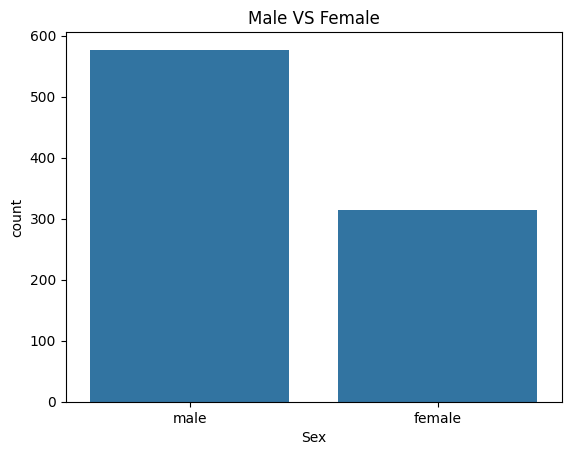

In [48]:
sns.countplot(data = df, x='Sex')
plt.title('Male VS Female')
plt.show()

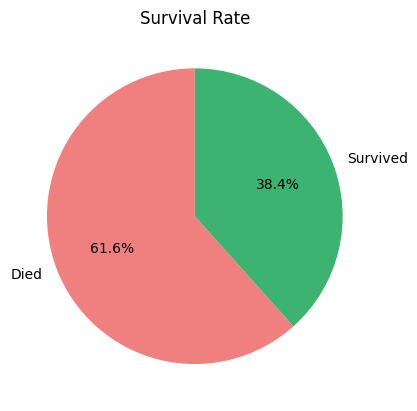

In [49]:
df['Survived'].value_counts().plot.pie( labels=['Died', 'Survived'],
                                        autopct= '%1.1f%%',
                                        startangle=90,
                                        colors=['lightcoral','mediumseagreen'])
plt.title('Survival Rate')
plt.ylabel('')
plt.show()                                      

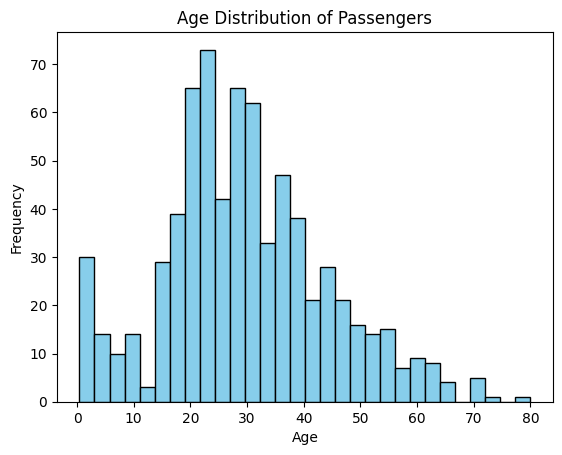

In [13]:
df['Age'].plot.hist(bins=30,color='skyblue', edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.show()

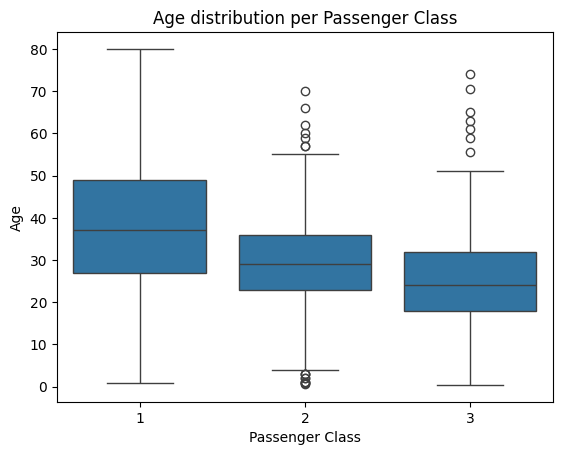

In [12]:
sns.boxplot(data=df, x='Pclass', y= 'Age')
plt.title('Age distribution per Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

In [50]:
df.columns
columns_to_drop = ['Name','Ticket','Cabin']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=columns_to_drop)

In [51]:
df.dropna(subset=['Embarked'],inplace=True)
df['Sex'] = df['Sex'].map({'male':0,'female':1})
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1,'Q': 2})

In [52]:
x = df.drop('Survived', axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [53]:
y_pred = model.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))                                              

Accuracy: 0.797752808988764


In [54]:
new_passenger = [[1000,2, 1, 28, 0, 0,30.00, 0]]
prediction = model.predict(new_passenger)

if prediction[0] == 1:
    print('This passenger would have SURVIVED✅')
else:
    print('This passenger would not have survived ❌')

This passenger would have SURVIVED✅


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
